
Instructions:
Download the wine dataset from the UCI Machine Learning Repository
Load the dataset into a Pandas dataframe.
Split the dataset into features and target variables.
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
Implement PCA on the preprocessed dataset using the scikit-learn library.
Determine the optimal number of principal components to retain based on the explained variance ratio.
Visualise the results of PCA using a scatter plot.
Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
Interpret the results of PCA and clustering analysis.
Deliverables:
Jupyter notebook containing the code for the PCA implementation.
A report summarising the results of PCA and clustering analysis.
Scatter plot showing the results of PCA.
A table showing the performance metrics for the clustering algorithm.

In [1]:
import pandas as pd

In [5]:
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine_data=pd.read_csv('wine.data',names=columns)

In [6]:
X=wine_data.iloc[:,1:]

In [14]:
y=wine_data.iloc[:,0] # class column

In [15]:
#data Preprocessing

In [16]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

## implement PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
import matplotlib.pyplot as plt

In [23]:
pca=PCA()

In [24]:
X_pca=pca.fit_transform(X_scaled)

In [25]:
# Determine the optimal number of principal component

explained_variance=pca.explained_variance_ratio_
cumulative_variance =explained_variance.cumsum()


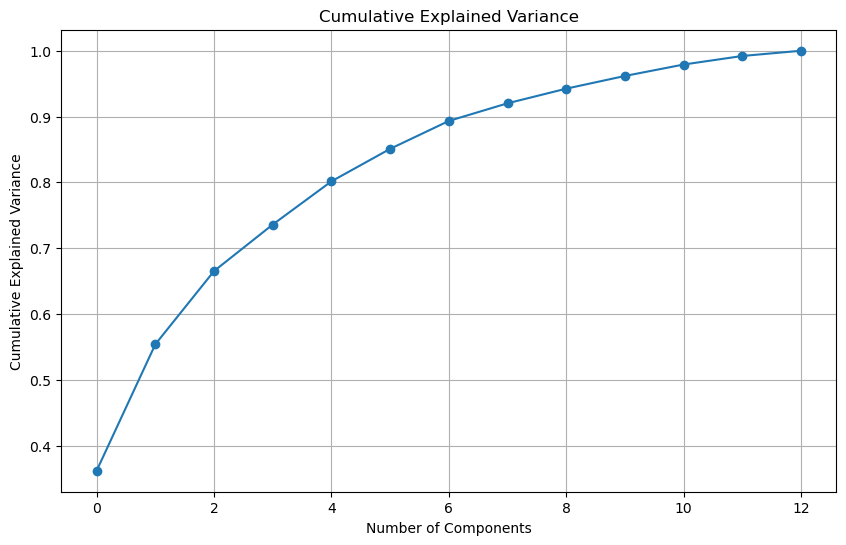

In [26]:
# Visualize explained variance

plt.figure(figsize=(10,6))
plt.plot(cumulative_variance,marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## perform CLustring

In [27]:
from sklearn.cluster import KMeans

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


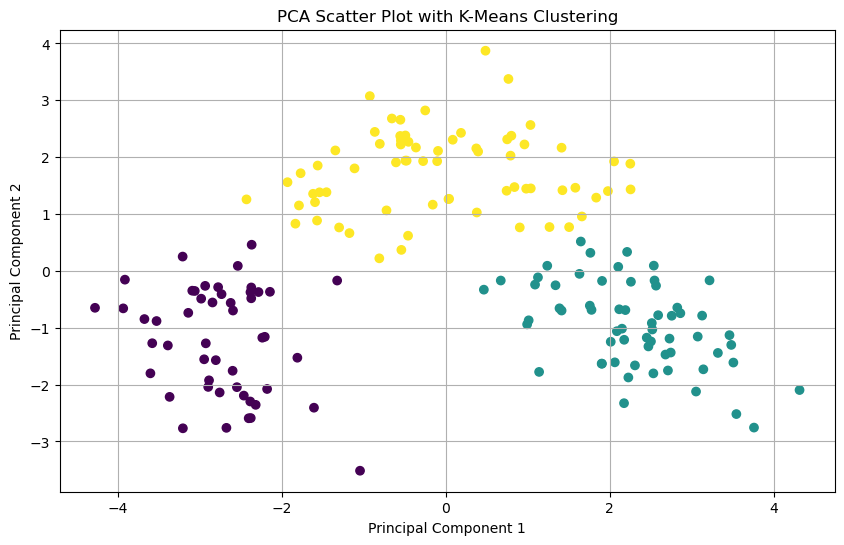

In [29]:
kmeans=KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_pca[:, :2])

# Visualize the PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot with K-Means Clustering')
plt.grid(True)
plt.show()

In [30]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_avg=silhouette_score(X_pca[:,:2],clusters)
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.5615238075263915


Interpreting the results of PCA and clustering analysis involves understanding the underlying structure and patterns revealed in the data. Let's break down the interpretation process into two parts: PCA results and clustering results.

### PCA Interpretation

- **Variance Explained**: The principal components are ordered by the amount of variance they capture from the dataset. The first principal component captures the most variance, the second captures the next highest amount, and so on. By examining the cumulative explained variance plot, you can determine how many components are needed to represent a significant portion of the variability in the data. For instance, if the first two principal components account for a high percentage (e.g., 70-80%) of the total variance, they are effectively summarizing most of the information contained in the original dataset.

- **Dimensionality Reduction**: PCA reduces the dimensionality of the data by projecting it onto the principal components. This can simplify the analysis and visualization while retaining the essential characteristics of the data. If the PCA shows that a small number of components capture most of the variance, it indicates that these components can serve as a simplified representation of the dataset.

- **Feature Correlations**: The orientation and makeup of the principal components can give insight into the relationships between the original features. For example, if two variables are highly correlated, they will likely contribute similarly to the same principal component.

### Clustering Interpretation

- **Cluster Formation**: After applying K-Means clustering on the PCA-transformed data, the data points are grouped into clusters based on their similarities. Each cluster represents a group of data points that are more similar to each other than to those in other clusters. The clustering results can reveal hidden patterns and structures in the data.

- **Cluster Characteristics**: Analyzing the properties of each cluster (e.g., central tendencies, spread, and constituent members) can provide insights into the underlying segments or categories within the dataset. For instance, in the context of the wine dataset, clusters may correspond to different types of wine with similar chemical properties or quality metrics.

- **Data Distribution**: The scatter plot of the PCA-transformed data with cluster labels shows how the data points are distributed across the principal components and how they form distinct groups. The spatial separation of clusters in the plot can indicate how well-defined the clusters are.

### Combining PCA and Clustering

Combining PCA with clustering offers a powerful method for analyzing and interpreting complex datasets:

- PCA reduces the dimensionality and noise in the data, making the inherent clustering structure more apparent and easier to analyze.
- Clustering on the PCA-transformed data can then identify distinct groups that may correspond to meaningful categories or segments in the original dataset.

By interpreting both the PCA and clustering results, you can gain a deeper understanding of the data’s structure, the relationships between its variables, and the natural groupings within it. This can inform decision-making, strategy development, and further data analysis processes.